In [1]:
# 07-4 concret

# 加载数据

In [ ]:
import pandas as pd
df=pd.read_csv('data/concrete.csv',encoding='gb18030')
df.head() # 数据前5行
df.shape # 数据行列数
df.info()  # 数据整体信息
df.describe()   # 描述性统计

In [2]:
import pandas as pd
df=pd.read_csv('data/concrete.csv',encoding='gb18030')
df.head() # 

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.shape

(1030, 9)

In [4]:
df.info()  # 数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cement    1030 non-null   float64
 1   slag      1030 non-null   float64
 2   ash       1030 non-null   float64
 3   water     1030 non-null   float64
 4   splast    1030 non-null   float64
 5   coarse    1030 non-null   float64
 6   fine      1030 non-null   float64
 7   age       1030 non-null   int64  
 8   strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()   # 描述性统计

,cement,slag,ash,water,splast,coarse,fine,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# 数据预处理

In [6]:
from sklearn.model_selection import train_test_split
# 数据拆分
array = df.values
X = array[:, 0:-1].astype(float)
Y = array[:, -1]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
# 数据标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

# 特征重要性

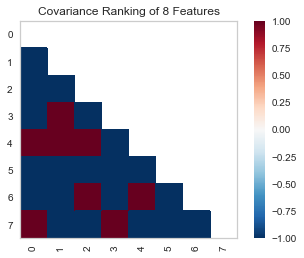

In [12]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='covariance') # 协方差
visualizer.fit(X, Y)
visualizer.transform(X)        
visualizer.poof()   

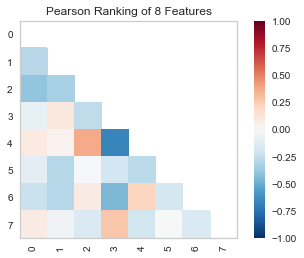

In [14]:
from yellowbrick.features import Rank2D
visualizer = Rank2D(algorithm='pearson')  # 皮尔森相关系数
visualizer.fit(X, Y) 
visualizer.transform(X) 
visualizer.poof() 

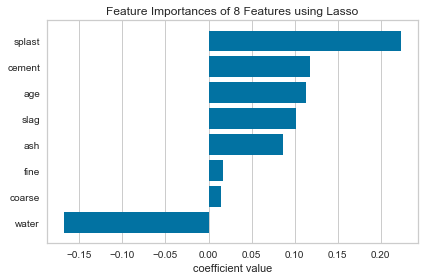

In [8]:
from sklearn.linear_model import Lasso
from yellowbrick.features.importances import FeatureImportances
labels = df.columns
viz = FeatureImportances(Lasso(), labels=labels, relative=False)
viz.fit(X, Y)
viz.poof()

# 数据分析

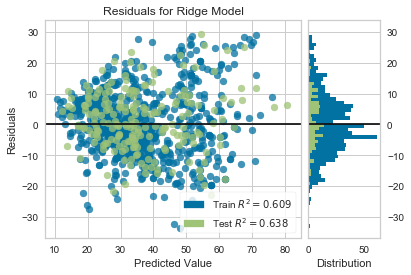

In [17]:
# Residuals Plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
# 可视化及验证
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_validation, Y_validation)
visualizer.poof()

0.6366772900019708


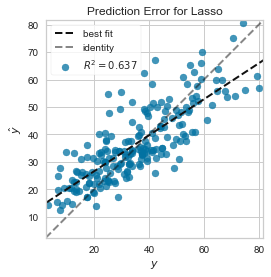

In [18]:
# Prediction Error Plot  预测错误分析
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError
# 可视化及验证
model = Lasso()
visualizer = PredictionError(model) # line_color='r'
visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
print(visualizer.score(X_validation, Y_validation))  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

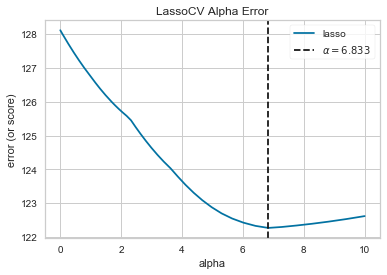

In [19]:
# Alpha Selection Alpha
import numpy as np
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
alphas = np.logspace(-10, 1, 400)
# 可视化及验证
model = LassoCV(alphas=alphas,cv=5)
visualizer = AlphaSelection(model)
visualizer.fit(X, Y)
visualizer.poof()

In [ ]:
alphas

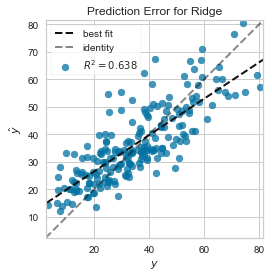

In [20]:
# 使用Alpha参数评估预测结果
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(Ridge(alpha=6.833))
visualizer.fit(X_train, Y_train)
visualizer.score(X_validation, Y_validation)
visualizer.poof()

In [22]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=6.833)
rg.fit(X_train, Y_train)

Ridge(alpha=6.833, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
rg.predict(X_validation[:10])

array([22.72396392, 27.92456287, 26.00603061, 15.37585836, 48.86433758,
       33.86655004, 55.2976556 , 20.11500794, 31.32723078, 20.08348799])

In [25]:
Y_validation[:10]

array([12.47262084,  7.39807748, 32.10269204, 10.08979178, 54.37828264,
       28.99108685, 67.568648  , 11.41427518, 39.28978986, 10.73031499])

# 单一模型

In [46]:
from yellowbrick.regressor import PredictionError
def test(model,name):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, Y_train)
    print(name+'得分：',visualizer.score(X_validation, Y_validation)) 
#     visualizer.poof() 
from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
# 标准化数据
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
# 评估算法
models = {}
models['REG'] = linear_model.Ridge ()
models['LSO'] = linear_model.Lasso()
models['BR'] = linear_model.BayesianRidge()
models['EN'] = linear_model.ElasticNet()
models['KNN'] = neighbors.KNeighborsRegressor() # 最佳
models['SVR'] = svm.SVR()
for key in models:
    model = models[key]
    test(model,key)   

REG得分： 0.6379422092420244
LSO得分： 0.5974558072515346
BR得分： 0.6376288842449216
EN得分： 0.5424268637712022
KNN得分： 0.7563490770221599
SVR得分： 0.6527833642810758


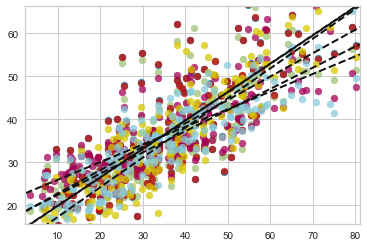

In [48]:
from sklearn import linear_model
from sklearn import neighbors
from sklearn import svm
# 标准化数据
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)
# 评估算法
models = {}
models['REG'] = linear_model.Ridge ()
models['LSO'] = linear_model.Lasso()
models['BR'] = linear_model.BayesianRidge()
models['EN'] = linear_model.ElasticNet()
models['KNN'] = neighbors.KNeighborsRegressor() # 最佳
models['SVR'] = svm.SVR()
for key in models:
    model = models[key]
    test(model,key)   

得分： 0.7563490770221599


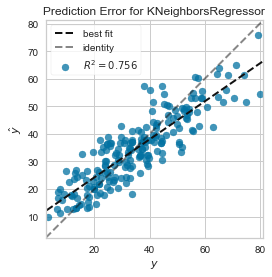

In [49]:
model = neighbors.KNeighborsRegressor()
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
print('得分：',visualizer.score(X_validation, Y_validation)) 
visualizer.poof()    

# 集成学习


In [28]:
from yellowbrick.regressor import PredictionError
# 模型评估
def test(model,name):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, Y_train)
    print(name+'得分：',visualizer.score(X_validation, Y_validation)) 
#     visualizer.poof()        

ScaledAB得分： 0.7785982641665851
ScaledGBM得分： 0.9230060737589608
ScaledRF得分： 0.8971606971518785


E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


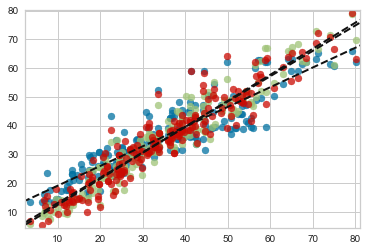

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())]) # 最佳
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])
for key in ensembles:
    model = ensembles[key]
    test(model,key) 

得分： 0.9223663433735072


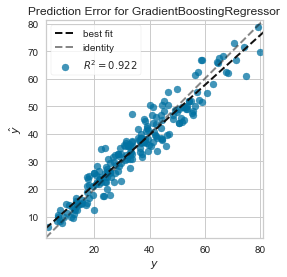

In [31]:
model = GradientBoostingRegressor()
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
print('得分：',visualizer.score(X_validation, Y_validation)) 
visualizer.poof()   

# 参数优化

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
num_folds = 10
seed = 7
scoring="r2"
param_grid  = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'alpha': [0.1, 0.3, 0.6, 0.9]}  
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(X=X_train, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.8989724184633737 使用{'alpha': 0.9, 'loss': 'huber', 'min_samples_leaf': 3}


In [36]:
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.8989759075756268 使用{'alpha': 0.9, 'loss': 'huber', 'min_samples_leaf': 3}


得分： 0.9268365941082176


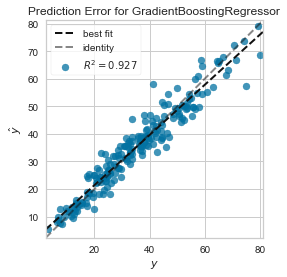

In [51]:
# 预测拟合曲线
model = GradientBoostingRegressor(alpha=0.9,loss= 'huber', min_samples_leaf= 3)
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
print('得分：',visualizer.score(X_validation, Y_validation)) 
visualizer.poof()   

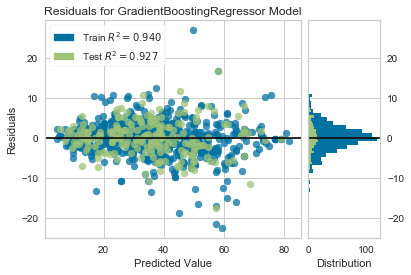

In [52]:
# 残差分析
from yellowbrick.regressor import ResidualsPlot
model = GradientBoostingRegressor(alpha=0.9,loss= 'huber', min_samples_leaf= 3)
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_validation, Y_validation)
visualizer.poof()

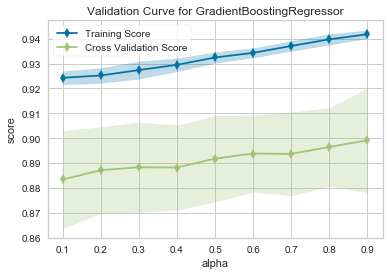

In [60]:
# 验证曲线
from yellowbrick.model_selection import ValidationCurve
model = GradientBoostingRegressor(alpha=0.9,loss= 'huber', min_samples_leaf= 3)
viz = ValidationCurve(
     GradientBoostingRegressor(loss= 'huber', min_samples_leaf= 3), param_name="alpha",
    param_range=np.arange(1, 10)/10, cv=10, scoring="r2")
viz.fit(X_train, Y_train)
viz.poof()

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


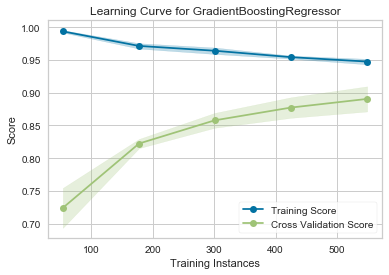

In [62]:
# 学习曲线
from yellowbrick.model_selection import LearningCurve
model = GradientBoostingRegressor(alpha=0.9,loss= 'huber', min_samples_leaf= 3)
viz = LearningCurve(model)
viz.fit(X_train, Y_train)
viz.poof()

# 模型持久化

## 模型保存

In [67]:
from sklearn.externals import joblib
model_file = 'data/concret.m'
model = GradientBoostingRegressor(alpha=0.9,loss= 'huber', min_samples_leaf= 3)
model.fit(X=X_train, y=Y_train)
joblib.dump(model, model_file) 

E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
E:\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


['data/concret.m']

## 模型加载

In [68]:
model2 = joblib.load(model_file) 
result = model2.score(X_validation, Y_validation)
print("算法评估结果：%.3f%%" % (result * 100))

算法评估结果：92.681%


In [70]:
# 预测测试数据前10
model2.predict(X_validation[0:5])

array([12.93659351, 12.93592865, 36.61798274, 12.00845992, 52.50962241])

In [71]:
# 对比测试数据真实分类
Y_validation[0:5]

array([12.47262084,  7.39807748, 32.10269204, 10.08979178, 54.37828264])